# overview
#### This kernel is based on last year's [Basic Starter Kernel](https://www.kaggle.com/addisonhoward/basic-starter-kernel-ncaa-men-s-dataset-2019).
#### I added total score feature calculated on a yearly basis :)

## Import Library & Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [3]:
tourney_result = pd.read_csv('Data/2020/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
tourney_seed = pd.read_csv('Data/2020/MDataFiles_Stage1/MNCAATourneySeeds.csv')

In [4]:
# deleting unnecessary columns
tourney_result = tourney_result.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], axis=1)
tourney_result

,Season,WTeamID,LTeamID
0,1985,1116,1234
1,1985,1120,1345
2,1985,1207,1250
3,1985,1229,1425
4,1985,1242,1325
5,1985,1246,1449
6,1985,1256,1338
7,1985,1260,1233
8,1985,1314,1292
9,1985,1323,1333


## Merge Seed

In [5]:
tourney_result = pd.merge(tourney_result, tourney_seed, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Seed':'WSeed'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result = pd.merge(tourney_result, tourney_seed, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Seed':'LSeed'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,X09,X08
1,1985,1120,1345,Z11,Z06
2,1985,1207,1250,W01,W16
3,1985,1229,1425,Y09,Y08
4,1985,1242,1325,Z03,Z14
5,1985,1246,1449,X12,X05
6,1985,1256,1338,Y05,Y12
7,1985,1260,1233,W04,W13
8,1985,1314,1292,Z02,Z15
9,1985,1323,1333,Z07,Z10


In [6]:
def get_seed(x):
    return int(x[1:3])

tourney_result['WSeed'] = tourney_result['WSeed'].map(lambda x: get_seed(x))
tourney_result['LSeed'] = tourney_result['LSeed'].map(lambda x: get_seed(x))
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,9,8
1,1985,1120,1345,11,6
2,1985,1207,1250,1,16
3,1985,1229,1425,9,8
4,1985,1242,1325,3,14
5,1985,1246,1449,12,5
6,1985,1256,1338,5,12
7,1985,1260,1233,4,13
8,1985,1314,1292,2,15
9,1985,1323,1333,7,10


## Merge Score

In [7]:
season_result = pd.read_csv('Data/2020/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')

In [8]:
season_win_result = season_result[['Season', 'WTeamID', 'WScore']]
season_lose_result = season_result[['Season', 'LTeamID', 'LScore']]
season_win_result.rename(columns={'WTeamID':'TeamID', 'WScore':'Score'}, inplace=True)
season_lose_result.rename(columns={'LTeamID':'TeamID', 'LScore':'Score'}, inplace=True)
season_result = pd.concat((season_win_result, season_lose_result)).reset_index(drop=True)
season_result

C:\Users\Ray\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Season,TeamID,Score
0,1985,1228,81
1,1985,1106,77
2,1985,1112,63
3,1985,1165,70
4,1985,1192,86
5,1985,1218,79
6,1985,1228,64
7,1985,1242,58
8,1985,1260,98
9,1985,1305,97


In [9]:
season_score = season_result.groupby(['Season', 'TeamID'])['Score'].sum().reset_index()
season_score

,Season,TeamID,Score
0,1985,1102,1514
1,1985,1103,1404
2,1985,1104,2055
3,1985,1106,1719
4,1985,1108,2075
5,1985,1109,1292
6,1985,1110,1736
7,1985,1111,1611
8,1985,1112,1796
9,1985,1113,1828


In [10]:
tourney_result = pd.merge(tourney_result, season_score, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Score':'WScoreT'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result = pd.merge(tourney_result, season_score, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
tourney_result.rename(columns={'Score':'LScoreT'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed,WScoreT,LScoreT
0,1985,1116,1234,9,8,2156,2092
1,1985,1120,1345,11,6,2040,1728
2,1985,1207,1250,1,16,2045,1907
3,1985,1229,1425,9,8,1933,1915
4,1985,1242,1325,3,14,2281,1824
5,1985,1246,1449,12,5,1837,2019
6,1985,1256,1338,5,12,2170,1826
7,1985,1260,1233,4,13,2575,2159
8,1985,1314,1292,2,15,2317,1748
9,1985,1323,1333,7,10,1956,1795


In [11]:
tourney_win_result = tourney_result.drop(['Season', 'WTeamID', 'LTeamID'], axis=1)
tourney_win_result.rename(columns={'WSeed':'Seed1', 'LSeed':'Seed2', 'WScoreT':'ScoreT1', 'LScoreT':'ScoreT2'}, inplace=True)
tourney_win_result

,Seed1,Seed2,ScoreT1,ScoreT2
0,9,8,2156,2092
1,11,6,2040,1728
2,1,16,2045,1907
3,9,8,1933,1915
4,3,14,2281,1824
5,12,5,1837,2019
6,5,12,2170,1826
7,4,13,2575,2159
8,2,15,2317,1748
9,7,10,1956,1795


In [12]:
tourney_lose_result = tourney_win_result.copy()
tourney_lose_result['Seed1'] = tourney_win_result['Seed2']
tourney_lose_result['Seed2'] = tourney_win_result['Seed1']
tourney_lose_result['ScoreT1'] = tourney_win_result['ScoreT2']
tourney_lose_result['ScoreT2'] = tourney_win_result['ScoreT1']
tourney_lose_result

,Seed1,Seed2,ScoreT1,ScoreT2
0,8,9,2092,2156
1,6,11,1728,2040
2,16,1,1907,2045
3,8,9,1915,1933
4,14,3,1824,2281
5,5,12,2019,1837
6,12,5,1826,2170
7,13,4,2159,2575
8,15,2,1748,2317
9,10,7,1795,1956


## Prepare Training Data

In [13]:
tourney_win_result['Seed_diff'] = tourney_win_result['Seed1'] - tourney_win_result['Seed2']
tourney_win_result['ScoreT_diff'] = tourney_win_result['ScoreT1'] - tourney_win_result['ScoreT2']
tourney_lose_result['Seed_diff'] = tourney_lose_result['Seed1'] - tourney_lose_result['Seed2']
tourney_lose_result['ScoreT_diff'] = tourney_lose_result['ScoreT1'] - tourney_lose_result['ScoreT2']

In [14]:
tourney_win_result['result'] = 1
tourney_lose_result['result'] = 0
tourney_result = pd.concat((tourney_win_result, tourney_lose_result)).reset_index(drop=True)
tourney_result

,Seed1,Seed2,ScoreT1,ScoreT2,Seed_diff,ScoreT_diff,result
0,9,8,2156,2092,1,64,1
1,11,6,2040,1728,5,312,1
2,1,16,2045,1907,-15,138,1
3,9,8,1933,1915,1,18,1
4,3,14,2281,1824,-11,457,1
5,12,5,1837,2019,7,-182,1
6,5,12,2170,1826,-7,344,1
7,4,13,2575,2159,-9,416,1
8,2,15,2317,1748,-13,569,1
9,7,10,1956,1795,-3,161,1


## Train

In [15]:
X_train = tourney_result.drop('result', axis=1)
y_train = tourney_result.result
X_train, y_train = shuffle(X_train, y_train)

In [16]:
logreg = LogisticRegression()
params = {'C': np.logspace(start=-5, stop=3, num=9)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.5492, with best C: 0.01


## Prepare Test Data

In [19]:
test_df = pd.read_csv('Data/2020/MDataFiles_Stage1/MSampleSubmissionStage1_2020.csv')

In [20]:
test_df['Season'] = test_df['ID'].map(lambda x: int(x[:4]))
test_df['WTeamID'] = test_df['ID'].map(lambda x: int(x[5:9]))
test_df['LTeamID'] = test_df['ID'].map(lambda x: int(x[10:14]))
test_df

,ID,Pred,Season,WTeamID,LTeamID
0,2015_1107_1112,0.5,2015,1107,1112
1,2015_1107_1116,0.5,2015,1107,1116
2,2015_1107_1124,0.5,2015,1107,1124
3,2015_1107_1125,0.5,2015,1107,1125
4,2015_1107_1129,0.5,2015,1107,1129
5,2015_1107_1138,0.5,2015,1107,1138
6,2015_1107_1139,0.5,2015,1107,1139
7,2015_1107_1140,0.5,2015,1107,1140
8,2015_1107_1153,0.5,2015,1107,1153
9,2015_1107_1157,0.5,2015,1107,1157


In [21]:
test_df = pd.merge(test_df, tourney_seed, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Seed':'Seed1'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, tourney_seed, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Seed':'Seed2'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, season_score, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Score':'ScoreT1'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, season_score, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Score':'ScoreT2'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df

,ID,Pred,Season,WTeamID,LTeamID,Seed1,Seed2,ScoreT1,ScoreT2
0,2015_1107_1112,0.5,2015,1107,1112,W14,Z02,2096,2599
1,2015_1107_1116,0.5,2015,1107,1116,W14,Z05,2096,2653
2,2015_1107_1124,0.5,2015,1107,1124,W14,Z03,2096,2212
3,2015_1107_1125,0.5,2015,1107,1125,W14,W15,2096,2287
4,2015_1107_1129,0.5,2015,1107,1129,W14,W11a,2096,2166
5,2015_1107_1138,0.5,2015,1107,1138,W14,Y12,2096,2400
6,2015_1107_1139,0.5,2015,1107,1139,W14,Y06,2096,2226
7,2015_1107_1140,0.5,2015,1107,1140,W14,Z11a,2096,2619
8,2015_1107_1153,0.5,2015,1107,1153,W14,Y08,2096,1996
9,2015_1107_1157,0.5,2015,1107,1157,W14,Z16,2096,2044


In [22]:
test_df['Seed1'] = test_df['Seed1'].map(lambda x: get_seed(x))
test_df['Seed2'] = test_df['Seed2'].map(lambda x: get_seed(x))
test_df['Seed_diff'] = test_df['Seed1'] - test_df['Seed2']
test_df['ScoreT_diff'] = test_df['ScoreT1'] - test_df['ScoreT2']
test_df = test_df.drop(['ID', 'Pred', 'Season', 'WTeamID', 'LTeamID'], axis=1)
test_df

,Seed1,Seed2,ScoreT1,ScoreT2,Seed_diff,ScoreT_diff
0,14,2,2096,2599,12,-503
1,14,5,2096,2653,9,-557
2,14,3,2096,2212,11,-116
3,14,15,2096,2287,-1,-191
4,14,11,2096,2166,3,-70
5,14,12,2096,2400,2,-304
6,14,6,2096,2226,8,-130
7,14,11,2096,2619,3,-523
8,14,8,2096,1996,6,100
9,14,16,2096,2044,-2,52


## Predict & Make Submission File

In [23]:
test_preds = clf.predict_proba(test_df)[:, 1]

In [24]:
submission_df = pd.read_csv('Data/2020/MDataFiles_Stage1/MSampleSubmissionStage1_2020.csv')
submission_df['Pred'] = test_preds
submission_df

,ID,Pred
0,2015_1107_1112,0.100314
1,2015_1107_1116,0.143934
2,2015_1107_1124,0.148476
3,2015_1107_1125,0.501100
4,2015_1107_1129,0.376195
5,2015_1107_1138,0.369522
6,2015_1107_1139,0.213289
7,2015_1107_1140,0.298861
8,2015_1107_1153,0.304147
9,2015_1107_1157,0.584492


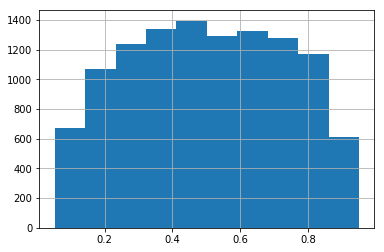

In [25]:
submission_df['Pred'].hist()

In [26]:
submission_df.to_csv('submission.csv', index=False)